<a href="https://colab.research.google.com/github/rushikeshnaik779/EDA/blob/master/Plotly_%26_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 

# basic Visualization tools 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

plt.rcParams['figure.dpi']= 300


In [2]:
from google.colab import files 

uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['StudentsPerformance.csv']))

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
!pip install seaborn
import seaborn as sns
sns.set_style("whitegrid")

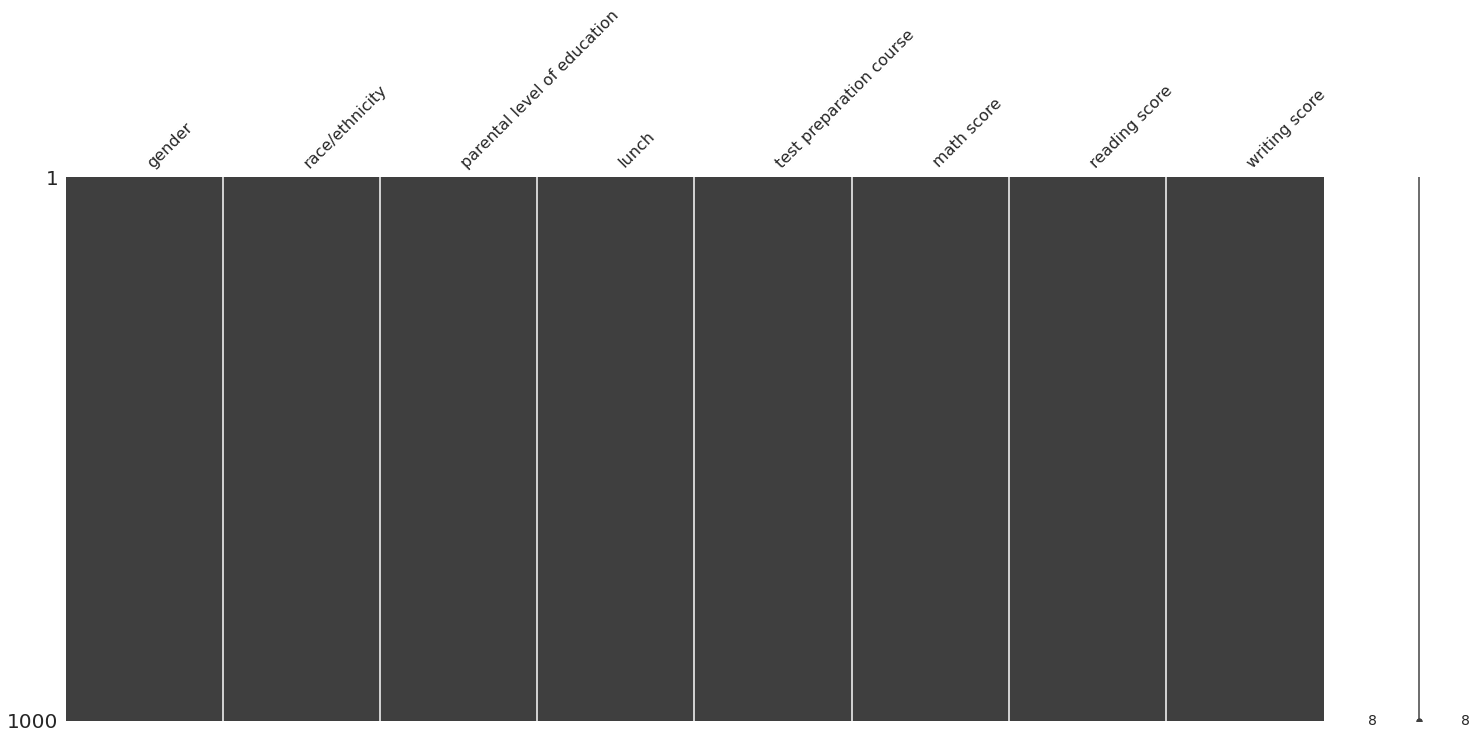

In [7]:
# checking NULL Data 

import missingno as msno 
msno.matrix(data)

In [8]:
# table view 
# Default notebook 
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
display(data)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [10]:
# Plotly go.Table 
import plotly.graph_objects as go 

fig = go.Figure()

fig.add_trace(
    go.Table(header=dict(values = data.columns), 
             cells = dict(values = data.head(3).T))
)

fig.show()

No handles with labels found to put in legend.


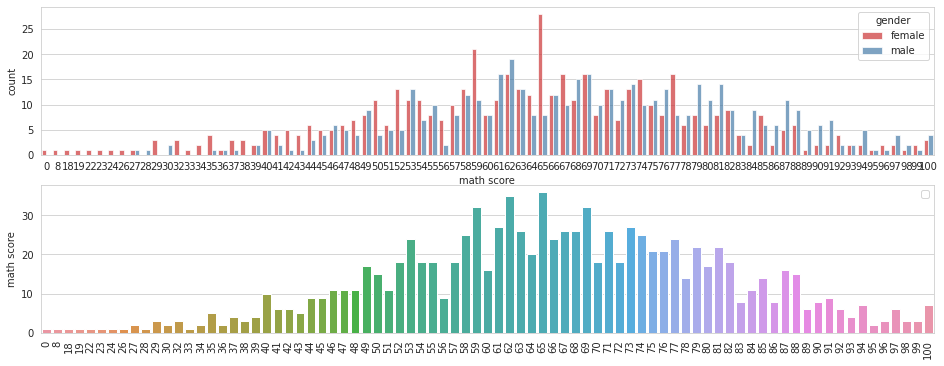

In [16]:
# Count plot 
## Seaborn : countplot, barplot + value_counts()

# TIPS
# - if you want to make it vertical, replace x by y. 
# - use alpha parameter to set opacity for more readable plot 
# - use hue to find features' trend 
# - use plt.xticks or plt.yticks to rotation xaxis label





fig, ax  = plt.subplots(2, 1, figsize=(16, 6))
# type 1 : use hue parameter 
sns.countplot(x='math score', data=data, hue='gender', palette='Set1',
              alpha=0.7, ax=ax[0])
plt.legend()

# type 2 : user value_counts + bar plot

sns.barplot(x=data['math score'].value_counts().index,
            y=data['math score'].value_counts(), ax=ax[1])
plt.xticks(rotation='vertical')

plt.show()


In [17]:
# plotly: px.Histogram , go.Histogram

In [18]:
# plotly doesn't have coutplot but with simple trick, we can make countplot
# (or You can use value_counts + bar trick again)

# plotly.express and plotly.graph_objects have histogram plot 
# we can set x & y parameter same feature (it means y is number of x )
# And set color like hue.
# you can change barmode as group 




In [20]:
import plotly.express as px

# type 1 stacked graph (default)
fig = px.histogram(data, x='math score', y='math score', color ='gender')
fig.show()

# type 2 group 
fig = px.histogram(data, x='math score', y='math score', color='gender')
fig.update_layout(barmode='group')
fig.show()